<a href="https://colab.research.google.com/github/ChristianParsons98/PG_Lab_Code/blob/main/LLTO_MultiPhase_XRD_Profex_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install adjustText

In [2]:
%matplotlib inline
from sympy import init_printing
init_printing(use_latex=True)
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import io
import bisect
from scipy.signal import savgol_filter
from adjustText import adjust_text
from matplotlib.lines import Line2D

# This document is to read in and plot XRD Fitting from Profex and assign hkl peak labels

#This document is for LLYTO Anatase

#You need to include two files:
# The Result file from Profex is: /content/LLYTO-8-22-2025.dia
# The list of peaks which can be exported from Profex: /content/LLYTO_A_PeakList.csv

#You need to choose a minimum intensity for your peak labels. I would recommend 0.01 at the lowest.

In [3]:
# User Chosen Variables:

#This is the minimum intensity peak which will be labeled.
hkl_Cutoff = 0.1

In [4]:
#Import the data from the two files

#Import the fit data from Profex
df_fit = pd.read_csv('/content/LLTO-8-22-2025.dia', delim_whitespace=True, skiprows=1, header=None)



# Import the list of peaks from Profex. Clean up the file.
with open('/content/Peak_List.csv', 'r') as f:
    lines = [line.strip() for line in f if line.strip() and not line.startswith('/')]

# Break the data into a form which is useful - column names and data
csv_text = "\n".join(lines)
reader = csv.reader(io.StringIO(csv_text), delimiter=' ', quotechar='"', skipinitialspace=True)
rows = list(reader)
columns = rows[0]
data = rows[1:]
peak_df = pd.DataFrame(data, columns=columns)

# Filter out and hlk peaks for the amorphous background
peak_df = peak_df[~peak_df["Phase"].str.lower().str.contains("amorphous", na=False)]

# Make strings from the three h k l columns.
peak_df["hkl"] = "(" + peak_df["h"].str.strip() + peak_df["k"].str.strip() + peak_df["l"].str.strip() + ")"
peak_df["Angle (°2θ)"] = pd.to_numeric(peak_df["Angle (°2θ)"], errors='coerce')
peak_df = peak_df.dropna(subset=["Angle (°2θ)"])

/tmp/ipython-input-2468932156.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_fit = pd.read_csv('/content/LLTO-8-22-2025.dia', delim_whitespace=True, skiprows=1, header=None)


<>:15: SyntaxWarning: invalid escape sequence '\T'
<>:15: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3093647912.py:15: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel("Angle 2$\Theta$")


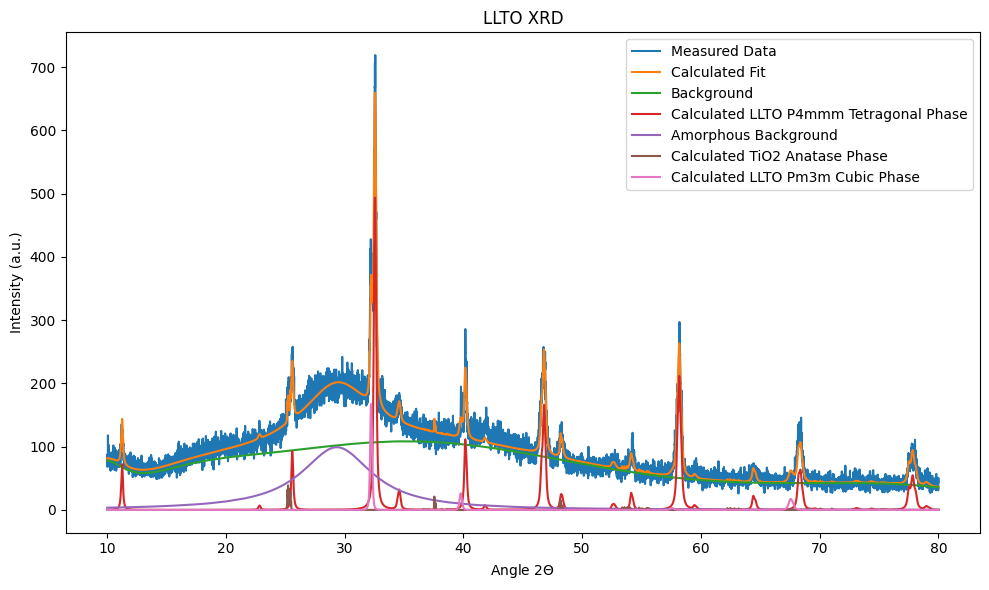

In [5]:
#Showing the data with the background

plt.figure(figsize=(10, 6))

#Manually add the column labels. The first column in the .dia file is the 2 Theta Diffraction Angle.
labels=['Measured Data','Calculated Fit', 'Background','Calculated LLTO P4mmm Tetragonal Phase','Amorphous Background',
        'Calculated TiO2 Anatase Phase','Calculated LLTO Pm3m Cubic Phase']

#First Column is the 2 theta angle which gets plotted to the x-axis
x = df_fit.iloc[:, 0]
#Iterate over the other columns, manually labeling with the labels list.
for i in range(1, df_fit.shape[1]):
    plt.plot(x, df_fit.iloc[:, i], label=labels[i-1])

plt.xlabel("Angle 2$\Theta$")
plt.ylabel("Intensity (a.u.)")
plt.title("LLTO XRD")
plt.legend()
#plt.grid(True)
plt.tight_layout()
#plt.savefig('LLYTO_Anatase_Yx0p05_XRD_Fit.png', dpi=900)
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\T'
<>:16: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3622121580.py:16: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel("Angle 2$\Theta$")


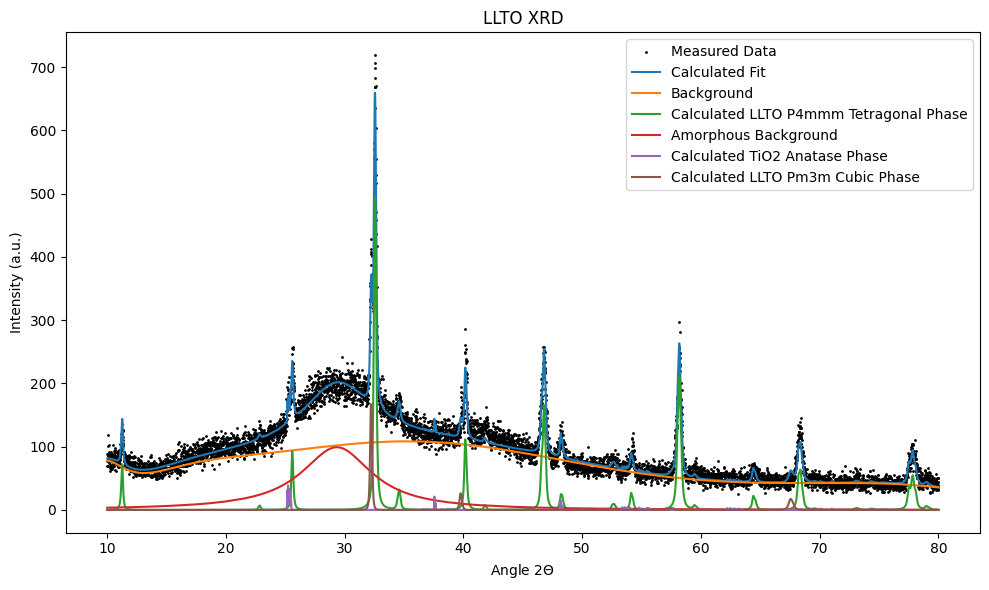

In [18]:
#Showing the data with the background

plt.figure(figsize=(10, 6))

#Manually add the column labels. The first column in the .dia file is the 2 Theta Diffraction Angle.
labels=['Measured Data','Calculated Fit', 'Background','Calculated LLTO P4mmm Tetragonal Phase','Amorphous Background',
        'Calculated TiO2 Anatase Phase','Calculated LLTO Pm3m Cubic Phase']

#First Column is the 2 theta angle which gets plotted to the x-axis
x = df_fit.iloc[:, 0]
#Iterate over the other columns, manually labeling with the labels list.
plt.scatter(x, df_fit.iloc[:, 1],label='Measured Data',s=1,c='k')
for i in range(2, df_fit.shape[1]):
    plt.plot(x, df_fit.iloc[:, i], label=labels[i-1])

plt.xlabel("Angle 2$\Theta$")
plt.ylabel("Intensity (a.u.)")
plt.title("LLTO XRD")
plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.savefig('LLTO_Multiphase_XRD_Fit.png', dpi=900)
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\T'
<>:16: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-1999281328.py:16: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel("Angle 2$\Theta$")


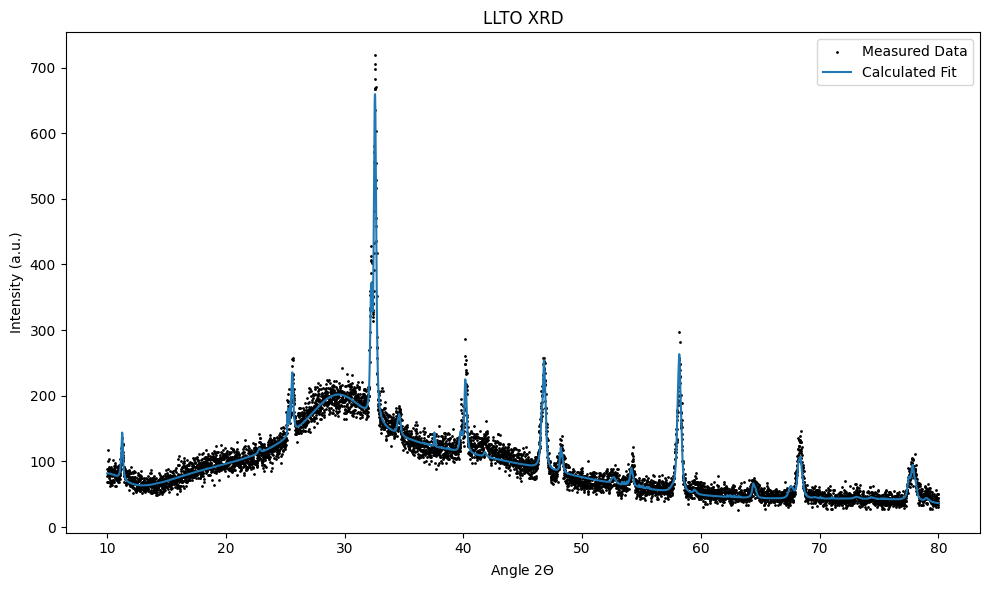

In [19]:
#Just the data and overall fit.

plt.figure(figsize=(10, 6))

#Manually add the column labels. The first column in the .dia file is the 2 Theta Diffraction Angle.
labels=['Measured Data','Calculated Fit', 'Background','Calculated LLTO P4mmm Tetragonal Phase','Amorphous Background',
        'Calculated TiO2 Anatase Phase','Calculated LLTO Pm3m Cubic Phase']

#First Column is the 2 theta angle which gets plotted to the x-axis
x = df_fit.iloc[:, 0]
#Iterate over the other columns, manually labeling with the labels list.
plt.scatter(x, df_fit.iloc[:, 1],label='Measured Data',s=1,c='k')
for i in range(2, 3):
    plt.plot(x, df_fit.iloc[:, i], label=labels[i-1])

plt.xlabel("Angle 2$\Theta$")
plt.ylabel("Intensity (a.u.)")
plt.title("LLTO XRD")
plt.legend()
#plt.grid(True)
plt.tight_layout()
#plt.savefig('LLTO_Zoomed_XRD_Fit.png', dpi=900)
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\T'
<>:16: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-259522526.py:16: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel("Angle 2$\Theta$")


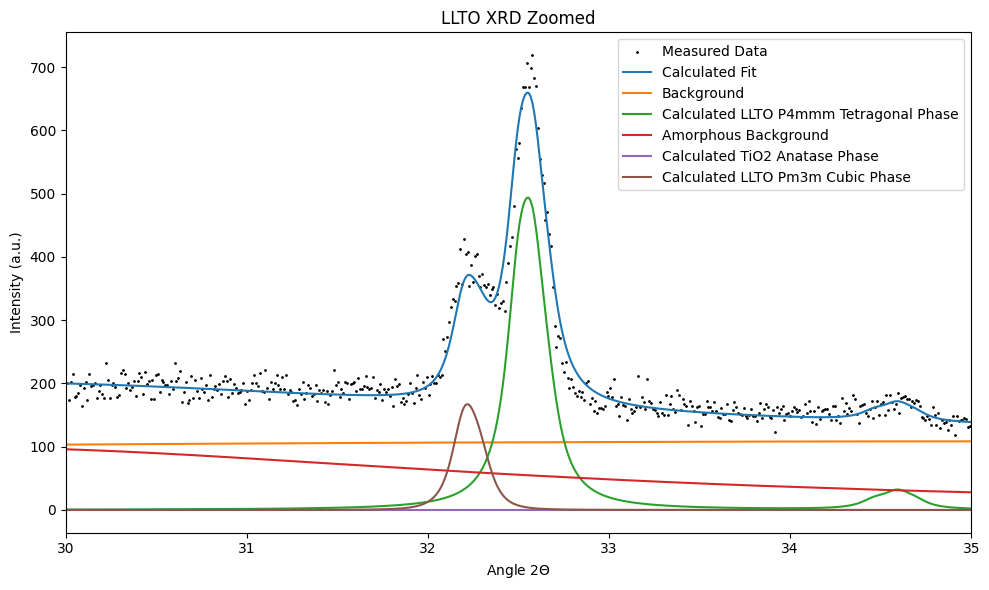

In [20]:
#Zooming in on the peak around 32 2Theta

plt.figure(figsize=(10, 6))

#Manually add the column labels. The first column in the .dia file is the 2 Theta Diffraction Angle.
labels=['Measured Data','Calculated Fit', 'Background','Calculated LLTO P4mmm Tetragonal Phase','Amorphous Background',
        'Calculated TiO2 Anatase Phase','Calculated LLTO Pm3m Cubic Phase']

#First Column is the 2 theta angle which gets plotted to the x-axis
x = df_fit.iloc[:, 0]
#Iterate over the other columns, manually labeling with the labels list.
plt.scatter(x, df_fit.iloc[:, 1],label='Measured Data',s=1,c='k')
for i in range(2, df_fit.shape[1]):
    plt.plot(x, df_fit.iloc[:, i], label=labels[i-1])

plt.xlabel("Angle 2$\Theta$")
plt.ylabel("Intensity (a.u.)")
plt.title("LLTO XRD Zoomed")
plt.legend()
plt.xlim(30,35)
#plt.grid(True)
plt.tight_layout()
plt.savefig('LLTO_Zoomed_XRD_Fit.png', dpi=900)
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\T'
<>:16: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-2537835667.py:16: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel("Angle 2$\Theta$")


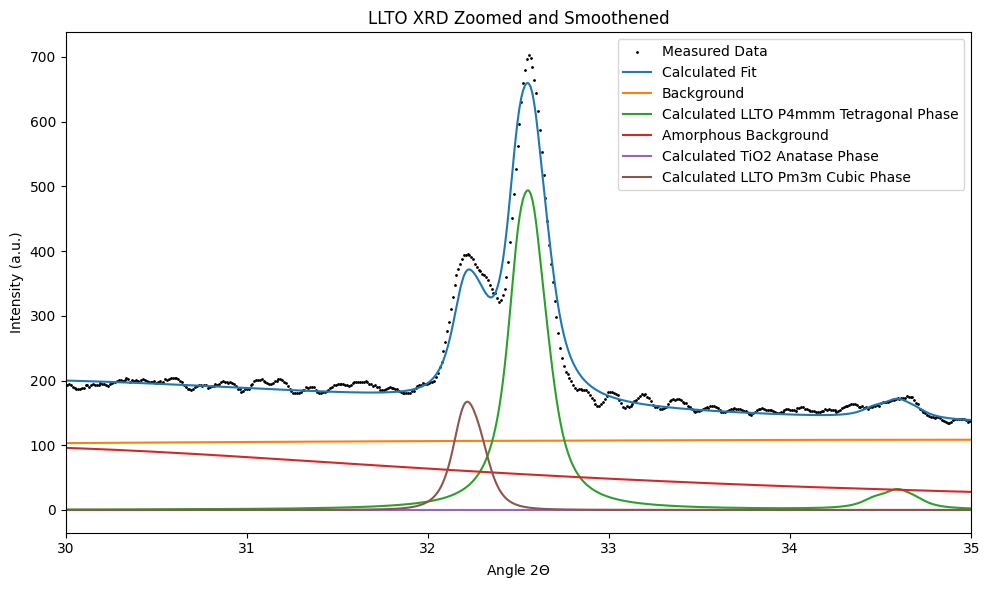

In [9]:
#Smoothing Data

plt.figure(figsize=(10, 6))

#Manually add the column labels. The first column in the .dia file is the 2 Theta Diffraction Angle.
labels=['Measured Data','Calculated Fit', 'Background','Calculated LLTO P4mmm Tetragonal Phase','Amorphous Background',
        'Calculated TiO2 Anatase Phase','Calculated LLTO Pm3m Cubic Phase']

#First Column is the 2 theta angle which gets plotted to the x-axis
x = df_fit.iloc[:, 0]
#Iterate over the other columns, manually labeling with the labels list.
plt.scatter(x, savgol_filter(df_fit.iloc[:, 1], window_length=23, polyorder=5),label='Measured Data',s=1,c='k')
for i in range(2, df_fit.shape[1]):
    plt.plot(x, df_fit.iloc[:, i], label=labels[i-1])

plt.xlabel("Angle 2$\Theta$")
plt.ylabel("Intensity (a.u.)")
plt.title("LLTO XRD Zoomed and Smoothened")
plt.legend()
plt.xlim(30,35)
#plt.grid(True)
plt.tight_layout()
#plt.savefig('LLYTO_Anatase_Yx0p05_XRD_Fit.png', dpi=900)
plt.show()

In [10]:
####################################
# Working on a plot for hkl labels #
####################################

In [11]:
#Let's make the labels for the phases more human readable.
unique_phases = list(dict.fromkeys(peak_df["Phase"].astype(str).str.strip()))  # preserve order
phase_label_map = {ph: f"<legend label for {ph}>" for ph in unique_phases}
print(phase_label_map)

{'Lanthanumlithiumtitaniumoxide060313': '<legend label for Lanthanumlithiumtitaniumoxide060313>', 'La050Li050TiO3': '<legend label for La050Li050TiO3>', 'TiO2Anatase': '<legend label for TiO2Anatase>'}


In [12]:
#The phases are usually not nice looking. Let's make them more readable.
#Use the above output for keys
phase_label_map = {
     'Lanthanumlithiumtitaniumoxide060313': 'Tetragonal P4mmm LLTO',
     'La050Li050TiO3': "Cubic Pm3m",
     'TiO2Anatase' : 'TiO2 Anatase I41/amd'
 }

-12.379999999999999
2 [-0.12423391 -0.60266922]
3 [-0.71093242 -0.2430143 ]
4 [0.14083501 0.36186253]
5 [-0.5306709  -0.16526422]
6 [0.38679098 0.22608787]
7 [ 0.99937781 -0.89613919]
8 [0.22541126 0.57299767]
9 [-0.45236307 -0.75937893]
16 [-0.53747356 -0.25828612]
17 [-0.72038229  0.18090809]


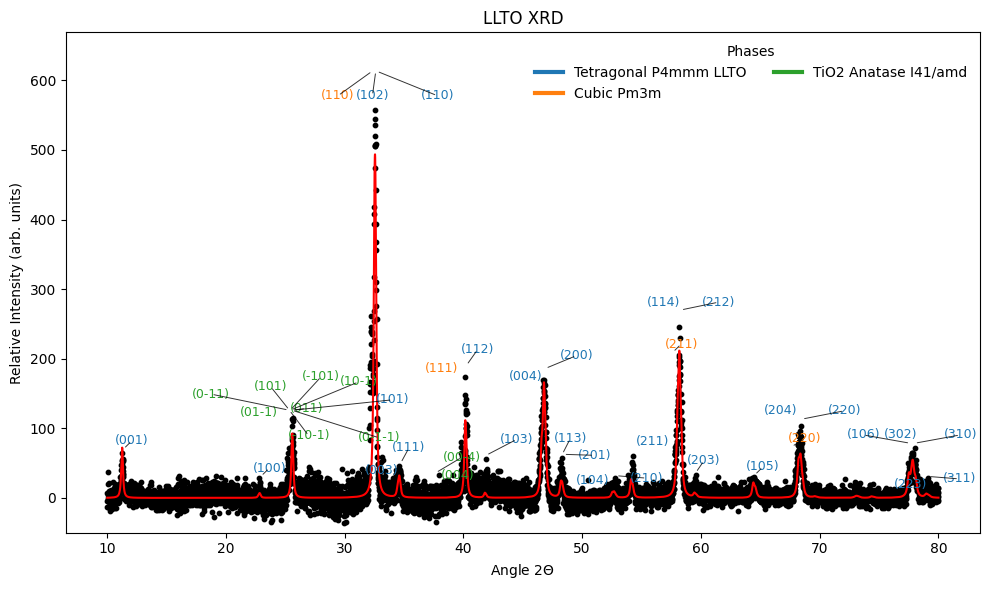

In [17]:
#Setting up the plot
# a lot is happening in this block of code.
plt.figure(figsize=(10, 6))

#Background Subtraction
# We want to plot the background subtracted data and the calculated spectrum
BG_sub_data = df_fit.iloc[:, 1] - df_fit.iloc[:, 3] - df_fit.iloc[:, 5]
Calc = df_fit.iloc[:, 4]
# Diffraction angle 2 theta
x = df_fit.iloc[:, 0]

print(BG_sub_data[5])

#Plot the BG sub data first along with the calculated spectrum.
plt.scatter(x, BG_sub_data, s=10, c='k', label="Measured (BG-sub)")
plt.plot(x, Calc, color='red', label="Calculated")

#Some helpers for figuring out where labels can go. Not needed in this iteration.
#Max_RelI = float(peak_df["Rel. intensity (%)"].max())
#y_top = Max_RelI  # nominal vertical scale if no underlying spectrum provided
#Plot_max = BG_sub_data.max()  # same nominal ceiling

# Colors per phase (tab10 repeated if more phases)
color_cycle = plt.rcParams["axes.prop_cycle"].by_key().get("color", [])
if not color_cycle:
    color_cycle = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
phase_colors = {
    ph: color_cycle[i % len(color_cycle)] for i, ph in enumerate(unique_phases)
}

#Placing hkl labels
texts = []
hkl_Cutoff = 0.1  # set a positive cutoff if you want to skip very weak peaks

for _, row in peak_df.iterrows():
    angle = float(row["Angle (°2θ)"])
    rel_int = float(row["Rel. intensity (%)"])
    if rel_int <= hkl_Cutoff:
        continue

    phase = str(row["Phase"]).strip()
    hkl_label = row["hkl"]
    color = phase_colors.get(phase, "k")

    # Initial y (same logic as your earlier snippet, but nominal scale here)
    idx = bisect.bisect_left(x, angle)
    y_pos = BG_sub_data[idx-50:idx+50].max()*1.1
    #y_pos = min(Plot_max * 0.96, rel_int*Plot_max)

    # Create text object at (x, y); adjust_text will move it along y only
    t = plt.text(angle, y_pos, hkl_label, ha="center", fontsize=9, color=color)
    texts.append(t)

# Stronger, 2D nudging with leader lines and axis clamping
adjust_text(
    texts,
    # allow movement in both x and y for points and text
    only_move={'points': 'xy', 'text': 'xy'},
    # make the solver push harder / farther apart
    force_text=(0.5, 0.5),        # (x_force, y_force); increase if still overlapping
    force_points=(0.2, 0.2),      # how strongly points repel text
    expand_text=(1.05, 1.15),     # text-to-text padding multipliers
    expand_points=(1.05, 1.15),   # point-to-text padding multipliers
    lim=100,                      # max iterations; raise if necessary
    precision=0.01,               # stop when moves are smaller than this
    # keep labels inside axes (no drifting out)
    keep_inside=True,
    # leader lines (required if nudging horizontally)
    arrowprops=dict(arrowstyle='-', lw=0.7, alpha=0.8)
)

#Adding Legend
legend_handles = []
for ph in unique_phases:
    shown_label = phase_label_map.get(ph) or ph  # fallback to phase name if user left it blank
    handle = Line2D([0], [0], color=phase_colors[ph], lw=3, label=shown_label)
    legend_handles.append(handle)

plt.legend(handles=legend_handles, title="Phases", frameon=False, ncol=2)

#Plotting
plt.xlabel("Angle 2$\\Theta$")
plt.ylabel("Relative Intensity (arb. units)")
plt.title("LLTO XRD")
plt.ylim(-50,BG_sub_data.max()*1.2)
plt.tight_layout()
plt.savefig('LLTO_XRD_MultiPhase_hkl.png', dpi=900)
plt.show()


In [14]:
#This is a way to smooth the data if interested.
smoothed_BG_Sub = savgol_filter(BG_sub_data, window_length=21, polyorder=5)


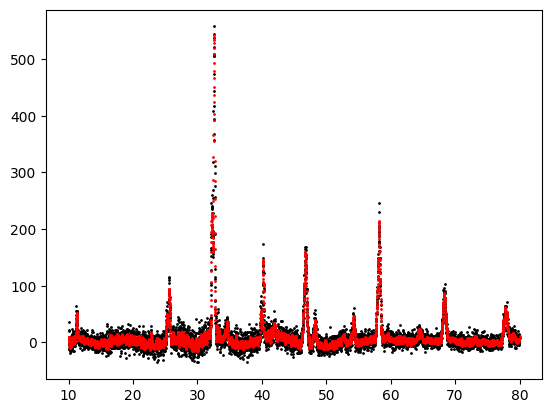

In [15]:
plt.scatter(x, BG_sub_data,label='Background Subtracted Measured Spectrum',s=1,c='k')
plt.scatter(x,smoothed_BG_Sub,color='red',s=1,label='Smoothed Background Subtracted Measured Spectrum')
plt.show()